Mahan Madani - 99222092

Assignment 1 - Life Expectancy Dataset

## Table of Contents:

- [Load Dataset and Import Libraries](##Load-Dataset-and-Import-Libraries)
- [Basic Data Analysis](##Basic-Data-Analysis)
- [Data Preprocessing](##Data-Preprocessing)
    - [Duplicate Values](###Check-for-Duplicate-Values)
    - [Null Values](###Handle-Null-Values)
    - [Feature Engineering](###Feature-Engineering)
- [Visualization](##Visualization)
- [Hypothesis Testing](##Hypothesis-Testing)
    - [Test 1 (t-test)](###Test-1:-t-test)
    - [Test 2 (t-test)](###Test-2:-t-test)
    - [Test 3 (ANOVA)](###Test-3:-ANOVA)
    - [Test 4 (Chi-2)](###Test-4:-Chi-2)
    - [Test 5 (Spearman Correlation)](###Test-5:-Spearman-Correlation)
- [Correlation](##Correlation)
- [Model](##Train-Model)
    - [Preparation](###Preparation)
    - [Train-test split I: Separate Countries](###Train-test-split-I:-Separate-countries)
    - [Train-test split II: Fully Randomized](###Train-test-split-II:-Fully-Randomized)
    - [Linear Regression With L1 Regularization (Lasso)](###Linear-Regression-With-L1-Regularization-(Lasso))

## Load Dataset and Import Libraries

In [1]:
import os, zipfile
import re

import pandas as pd
import numpy as np
from scipy.stats import zscore

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# !pip install kaggle

# kaggle token
os.environ['KAGGLE_CONFIG_DIR'] = "./.kaggle"

!kaggle datasets download -p ./dataset kumarajarshi/life-expectancy-who

life-expectancy-who.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
with zipfile.ZipFile('./dataset/life-expectancy-who.zip', 'r') as zip_ref:
    zip_ref.extractall('./dataset')

In [4]:
df = pd.read_csv("dataset/Life Expectancy Data.csv")
print(df.columns)
print(df.shape)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')
(2938, 22)


In [5]:
df.rename(columns={'Life expectancy ': 'Life expectancy'}, inplace=True)

## Basic Data Analysis

In [6]:
pd.options.display.max_columns = None
df.head(3)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9


In [7]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [8]:
df.describe(include=['object'])

,Country,Status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

## Data Preprocessing

### Check for Duplicate Values

In [10]:
columns_to_check_duplicates = list(df.columns)
print(columns_to_check_duplicates)

duplicated = df.duplicated(subset=columns_to_check_duplicates, keep=False)
duplicate_rows = df[duplicated]

if not duplicate_rows.empty:
    print("Duplicate records found:")
    print(duplicated.sum())
else:
    print("No duplicate records found.")

['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']
No duplicate records found.


No Duplicate records were found, so no further action is required.

### Handle Null Values

In [11]:
null_counts = df.isnull().sum()
null_table = pd.DataFrame(null_counts, columns=["Null Count"])
null_table

,Null Count
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


Several of the features in the dataset contain null values that must be handled.
<br>10 records are missing the value for `Life Expectancy`, which is the target variable. I decided to drop these records to avoid imputing the target.
<br>Many of the other missing values (such as `population`) can't be imputated using interpolation as there is no data availble for them. For example, we can't accurately determine a country's population based on another country's population. This forced me to choose a global method, and I decided to replace all null values with the median of their respective columns.

In [12]:
df = df.dropna(subset=['Life expectancy']).reset_index(drop=True)

In [13]:
numerical_columns = df.select_dtypes(include=['number']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

In [14]:
null_counts = df.isnull().sum()
null_table = pd.DataFrame(null_counts, columns=["Null Count"])
null_table

,Null Count
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


### Feature Engineering

Two of the features in the dataset must be transformed to numerical forms so they can be used in training the model. So I converted `Status` to a boolean variable and encoded `country` using label encoder. A better approach would've been to use one-hot encoding for country, but that would significantly increase the dimensionality of the dataset, which can negatively affect the model training process. This problem can be sovled using PCA or SVM.

In [15]:
# Generate boolean feature for 'Status'
mapping = {'Developed': True, 'Developing': False}
df['is developed'] = df['Status'].map(mapping)

In [16]:
# Encode countries with a simple labelencoder
label_encoder = LabelEncoder()
df['country_encoded'] = label_encoder.fit_transform(df['Country'])

## Visualization

In [17]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'is developed',
       'country_encoded'],
      dtype='object')

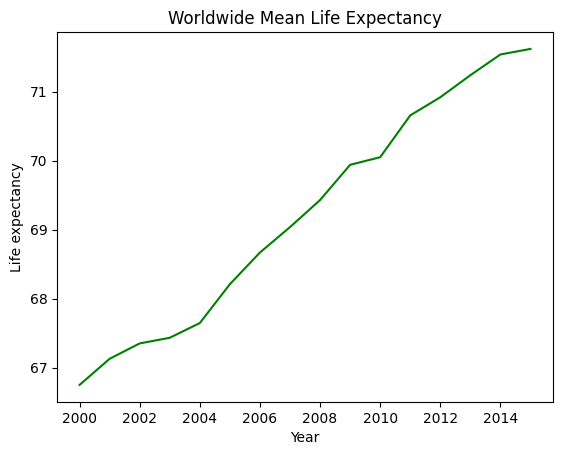

In [18]:
df.groupby('Year')['Life expectancy'].mean().plot(kind='line', color='green')

plt.title('Worldwide Mean Life Expectancy')
plt.ylabel('Life expectancy')
plt.xlabel('Year')
plt.show()

This Plot displays the overall growth of `Life Expectancy` across the world, regardless of country. The Average life expectancy has increased by 4 years over a decade.

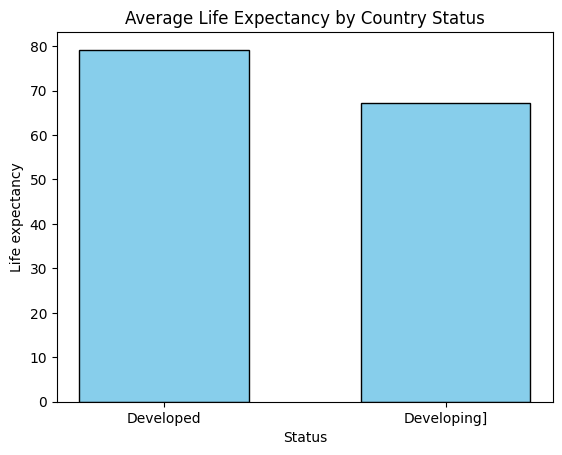

In [19]:
y1 = df[df['Status'] == 'Developed']['Life expectancy'].mean()
y2 = df[df['Status'] == 'Developing']['Life expectancy'].mean()

plt.bar(['Developed', 'Developing]'], [y1,y2], color='skyblue', edgecolor='black', width=0.6)

plt.title('Average Life Expectancy by Country Status')
plt.ylabel('Life expectancy')
plt.xlabel('Status')
plt.show()

This plot compares the average `Life Expectancy` of developed and developing countries, showing that `Status` may have a significant relationship with it.

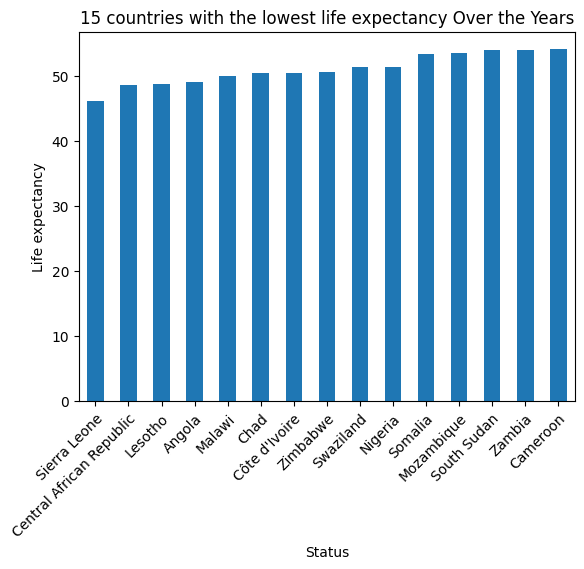

In [20]:
df.groupby('Country')['Life expectancy'].mean().sort_values(ascending=True).head(15).plot(kind='bar')

plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.title('15 countries with the lowest life expectancy Over the Years')
plt.ylabel('Life expectancy')
plt.xlabel('Status')
plt.show()

I grouped the dataset by `Country` and then calculated the average `Life Expectancy` of each country over the years. These 15 countries have the lowest life expectancy values.

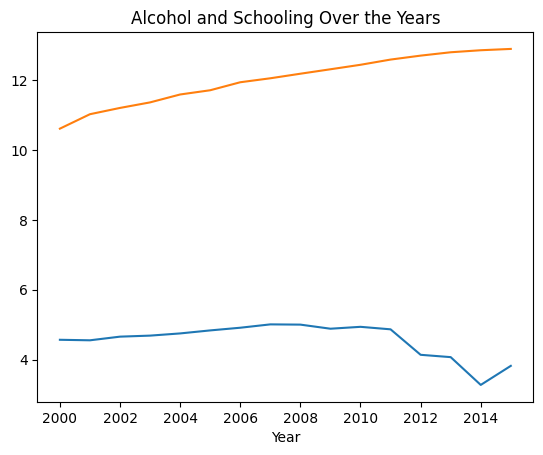

In [21]:
df.groupby('Year')['Alcohol'].mean().plot(kind='line')
df.groupby('Year')['Schooling'].mean().plot(kind='line')

plt.title('Alcohol and Schooling Over the Years')
plt.show()

This line plot displays the change of two variables (`Alcohol` and `Schooling`) over the years. Unfortunately, the dataset's source does not provide much detail into what each of these attributes mean or what their measure of calculation is.

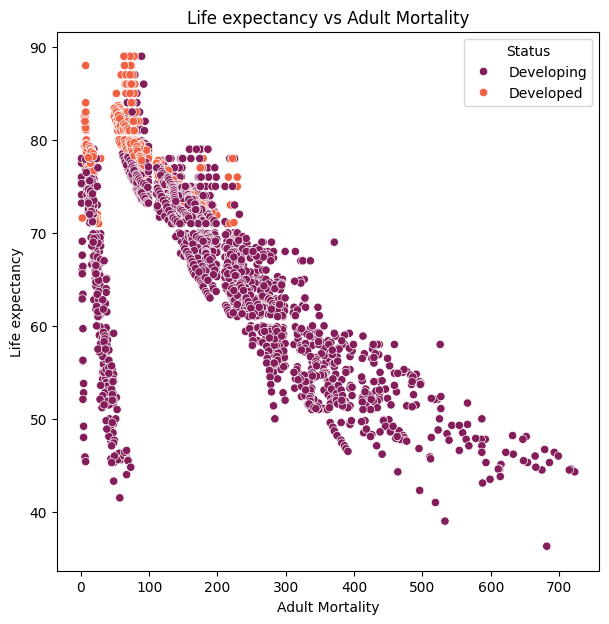

In [22]:
plt.figure(figsize=[7,7])
sns.scatterplot(y='Life expectancy',
                x='Adult Mortality',
                data=df,
                hue='Status',
                palette='rocket')

plt.title('Life expectancy vs Adult Mortality')
plt.ylabel('Life expectancy')
plt.xlabel('Adult Mortality')
plt.show()

This scatter plot display the negative relationship between `Life Expectancy` and `Adult mortality`. In the hypothesis testing section, one of the tests I proposed proves the relationship between these two variables is significant. This is also true for the relationship between `Status` and `Life Expectancy`.

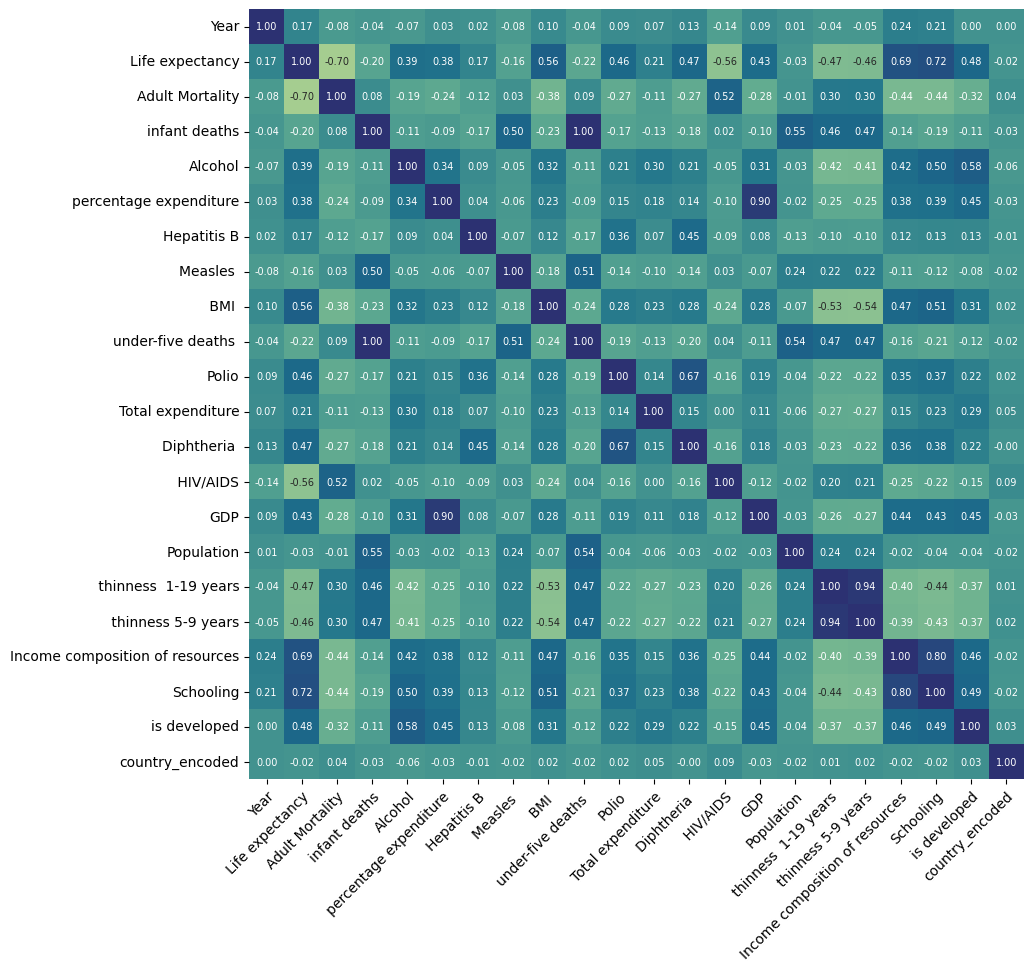

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='crest', annot_kws={"fontsize": 7}, fmt='.2f', cbar=False)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.show()

## Hypothesis Testing

### Test 1: t-test
Null Hypothesis: There is no significant relationship between status and "Hepatitis B" vaccination rates.

Test type: Two Sample t-test

In [24]:
sample_size = 200
sample = df.sample(n=sample_size, random_state=3)

group1 = df[df['Status'] == 'Developed']['Hepatitis B']
group2 = df[df['Status'] == 'Developing']['Hepatitis B']

In [25]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(group1, group2)

print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

T-Statistic: 6.9314074728874795
P-Value: 5.105362433917099e-12
Reject the null hypothesis.


Conclusion: The null hypothesis is rejected and the alternative hypothesis is accepted.
<br>**Alternative hypothesis:** There is a significant relationship between status and "Hepatitis B" vaccination rates.

### Test 2: t-test
Null Hypothesis: There is no significant relationship between status and Life expectancy.

Test type: Two Sample t-test

In [26]:
sample_size = 200
sample = df.sample(n=sample_size, random_state=5)

group1 = df[df['Status'] == 'Developed']['Life expectancy']
group2 = df[df['Status'] == 'Developing']['Life expectancy']

In [27]:
t_statistic, p_value = ttest_ind(group1, group2)

print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

T-Statistic: 29.76836505889292
P-Value: 2.4650861700062064e-170
Reject the null hypothesis.


Conclusion: The null hypothesis is rejected and the alternative hypothesis is accepted.
<br>**Alternative hypothesis:** There is a significant relationship between status and Life expectancy.

### Test 3: ANOVA
Null Hypothesis: There is no significant relationship between Year and Life expectancy.

Test type: One Way ANOVA

In [28]:
from scipy.stats import f_oneway

grouped_data = [group['Life expectancy'] for name, group in df.groupby('Year')]
anova_result = f_oneway(*grouped_data)

statistic = anova_result.statistic
p_value = anova_result.pvalue

print(f"Statistic: {statistic}")
print(f"P-Value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Statistic: 5.837496822962786
P-Value: 4.508349816377376e-12
Reject the null hypothesis.


Conclusion: The null hypothesis is rejected and the alternative hypothesis is accepted.
<br>**Alternative hypothesis:** There is a significant relationship between Year and Life expectancy.

### Test 4: Chi-2
Null Hypothesis: There is no significant relationship between status and Year.

Test type: Chi-2

In [29]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Status'], df['Year'])

chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Chi-Square Statistic: 0.0
P-value: 1.0
Fail to reject the null hypothesis.


Conclusion: This test has **failed** to reject the null hypothesis, meaning the alternative hypothesis is incorrect.

### Test 5: Spearman Correlation
Null Hypothesis: There is no significant relationship between Life expectancy and Adult Mortality.

Test type: Spearman Correlation

In [30]:
from scipy.stats import spearmanr

correlation_coefficient, p_value = spearmanr(df['Life expectancy'], df['Adult Mortality'])

print("Spearman correlation coefficient:", chi2)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Spearman correlation coefficient: 0.0
P-value: 0.0
Reject the null hypothesis.


Conclusion: The null hypothesis is rejected and the alternative hypothesis is accepted.
<br>**Alternative hypothesis:** There is a significant relationship between Life expectancy and Adult Mortality.

## Correlation

In [31]:
correlation_matrix = df.corr(numeric_only=True)
correlation_with_target = correlation_matrix[['Life expectancy']].sort_values(by='Life expectancy')
print(correlation_with_target)

                                 Life expectancy
Adult Mortality                        -0.696359
 HIV/AIDS                              -0.556556
 thinness  1-19 years                  -0.467859
 thinness 5-9 years                    -0.462645
under-five deaths                      -0.222529
infant deaths                          -0.196557
Measles                                -0.157586
Population                             -0.028842
country_encoded                        -0.017901
Year                                    0.170033
Hepatitis B                             0.171255
Total expenditure                       0.209588
percentage expenditure                  0.381864
Alcohol                                 0.390674
GDP                                     0.430991
Polio                                   0.459458
Diphtheria                              0.473268
is developed                            0.482136
 BMI                                    0.558888
Income composition o

Below you can find a heatmap of all of the correlations between the target variable and every other numeric variable. The heatmap is sorted in order of correlation, so the features to the left have the most negative correaltion while the features to the right have the most positive correlation.

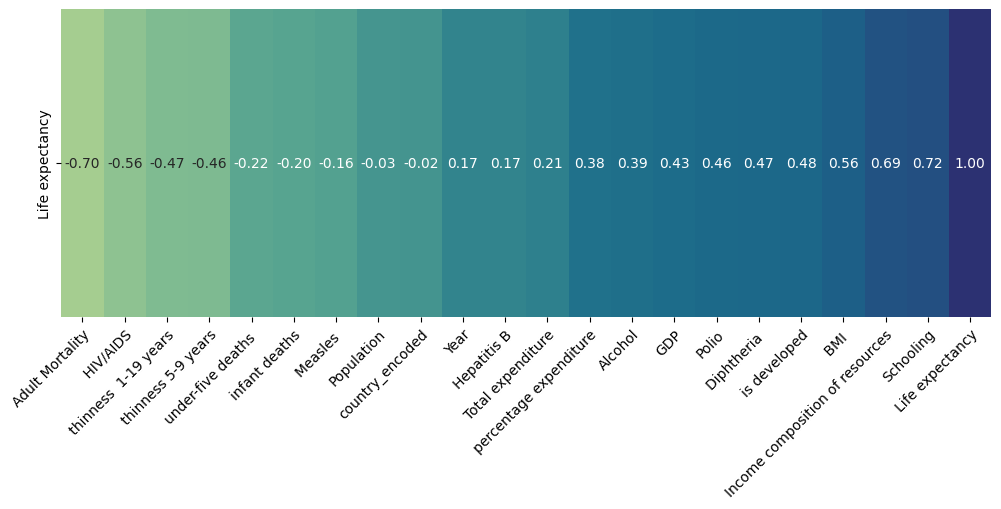

In [32]:
plt.figure(figsize=(12,4))
sns.heatmap(correlation_with_target.T, annot=True, cmap='crest', annot_kws={"fontsize": 10}, fmt='.2f', cbar=False)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.show()

## Train Model

### Preparation

I used a standard scaler to scale all of the train and test data. The target variable (Life Expectancy) remains untouched.

In [33]:
X = df.select_dtypes(include=['number'])
X = X.drop(columns=['Life expectancy'])

y = df['Life expectancy']

In [34]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
X = pd.DataFrame(scaled_features, columns=X.columns)

I created a number of utility functions to simplify training and testing regression models.

In [35]:
def train_linear_regression_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

In [36]:
def test_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE: {mse}")

In [37]:
def print_model_weights(model):
    feature_names = X.columns
    weights = model.coef_

    weights_df = pd.DataFrame({'Feature name': feature_names, 'Weight': weights}).sort_values(by='Weight', ascending=False)
    print(weights_df)

### Train-test split I: Separate countries

I manully distributed the records to create the train-test splits. Approximately, 70% of the records should end up in the train dataset and 30% will end up in the test dataset. None of the countries will be shared between the two sets.
<br>*Note that the main dataset is already sorted by Country.

In [38]:
train_set_size = 0
unique_countries = X['country_encoded'].unique()

# find the index which can separate the the dataset. The main dataset is already sorted by Country.
for country in unique_countries:
    if train_set_size < 0.7 * len(X):
        country_data = X[X['country_encoded'] == country]
        train_set_size += len(country_data)
    else:
        break

X_train = X.iloc[:train_set_size].copy()
X_test = X.iloc[train_set_size:].copy()
y_train = y.iloc[:train_set_size].copy()
y_test = y.iloc[train_set_size:].copy()

In [39]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(2064, 20)
(2064,)
(864, 20)
(864,)


Model results if the country feature is used for training:

In [40]:
model = train_linear_regression_model(X_train, y_train)
test_model(model, X_test, y_test)
# print_model_weights(model)

MSE: 20.446520159013836


Model results if the country feature is not used for training:

In [41]:
X_train = X_train.drop(columns=['country_encoded'])
X_test = X_test.drop(columns=['country_encoded'])

In [42]:
model = train_linear_regression_model(X_train, y_train)
test_model(model, X_test, y_test)

MSE: 20.396264208078623


**Conclusion:**
Utilizing or not utilizing the country feature in the training process has little effect on the loss value. But ultimately, not using the country feature slightly improves results.

### Train-test split II: Fully Randomized

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [44]:
model = train_linear_regression_model(X_train, y_train)
test_model(model, X_test, y_test)

MSE: 15.838290593339554


**Conclusion:**
Randomizing the train-test split yields better results with a lower MSE. This approach seems to work best as our model has a chance to train itself on more varied data, allowing it to better predict the target variable.

### Linear Regression With L1 Regularization (Lasso)

In [45]:
# Alpha is a hyperparameter. Adjusting it can change the regularization strength
alpha = 0.1 
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
test_model(lasso, X_test, y_test)

MSE: 16.515135030973017


In [46]:
print_model_weights(lasso)

                       Feature name    Weight
18                        Schooling  2.286942
17  Income composition of resources  1.299268
11                      Diphtheria   1.085449
7                              BMI   0.869033
9                             Polio  0.670546
13                              GDP  0.553777
3                           Alcohol  0.341212
19                  country_encoded  0.180636
4            percentage expenditure  0.132932
10                Total expenditure  0.100814
14                       Population  0.000000
16               thinness 5-9 years -0.000000
2                     infant deaths -0.000000
0                              Year -0.029947
8                under-five deaths  -0.102747
6                          Measles  -0.144313
5                       Hepatitis B -0.296928
15             thinness  1-19 years -0.313932
12                         HIV/AIDS -2.329370
1                   Adult Mortality -2.533734


Using Lasso doesn't seem to have much effect here as its main goal is to avoid overfitting. I believe the dataset isn't large enough to cause overfitting issues.